In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv('Breast.csv')
data.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [3]:
data['type'].unique()

array(['basal', 'HER', 'cell_line', 'normal', 'luminal_A', 'luminal_B'],
      dtype=object)

In [4]:
len(data)

151

In [5]:
cancer_type = data['type']

# one-hot encoding 'type' column
data_one_hot = pd.get_dummies(data['type'])
data_one_hot = pd.concat([data.drop('type', axis = 1), data_one_hot], axis = 1)
data_one_hot

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,HER,basal,cell_line,luminal_A,luminal_B,normal
0,84,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,...,4.901594,2.966657,3.508495,3.301999,False,True,False,False,False,False
1,85,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,...,5.405839,2.934763,3.687666,3.064299,False,True,False,False,False,False
2,87,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,...,5.184286,2.847684,3.550597,3.158535,False,True,False,False,False,False
3,90,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,...,5.086569,3.031602,3.524981,3.272665,False,True,False,False,False,False
4,91,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,...,5.235318,2.956232,3.445501,3.193947,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,230,10.392638,7.334408,6.848586,7.020486,3.228065,7.815439,5.448470,4.496955,8.015534,...,6.209136,2.852852,3.697448,3.333289,False,False,False,False,True,False
147,233,10.930875,8.415294,5.906827,7.753572,3.270557,7.367931,5.906849,5.194349,8.248133,...,7.108210,2.929800,3.833289,3.213893,False,False,False,False,True,False
148,236,11.027098,7.180876,6.304736,7.641197,3.206950,8.569296,5.823146,4.617309,7.523521,...,7.329545,3.085127,3.628848,3.215807,False,False,False,False,True,False
149,237,10.444395,7.525153,5.964460,7.825939,3.384147,7.268454,5.245072,5.088004,7.364773,...,7.089259,3.018525,3.770597,3.102298,False,False,False,False,True,False


## Visualising using PCA

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_one_hot)
data_pca = pd.DataFrame(data_pca, columns = ['PC1', 'PC2', "PC3"])

data_pca.head()

,PC1,PC2,PC3
0,121.050371,-21.744221,-6.478726
1,108.849847,-36.810627,6.327569
2,131.031962,18.314177,0.290776
3,99.920003,-46.516147,0.095916
4,99.760043,-42.121018,-6.875612


Davies-Bouldin score for 2 clusters: 0.8630293592882882
Davies-Bouldin score for 3 clusters: 0.5821557925066396
Davies-Bouldin score for 4 clusters: 0.8357491087590186
Davies-Bouldin score for 5 clusters: 0.7303435660149076
Davies-Bouldin score for 6 clusters: 0.7042493092922232
Davies-Bouldin score for 7 clusters: 0.9000601518386854
Davies-Bouldin score for 8 clusters: 0.9118576579997242
Davies-Bouldin score for 9 clusters: 0.9341298246173595
Davies-Bouldin score for 10 clusters: 0.8623335235625371


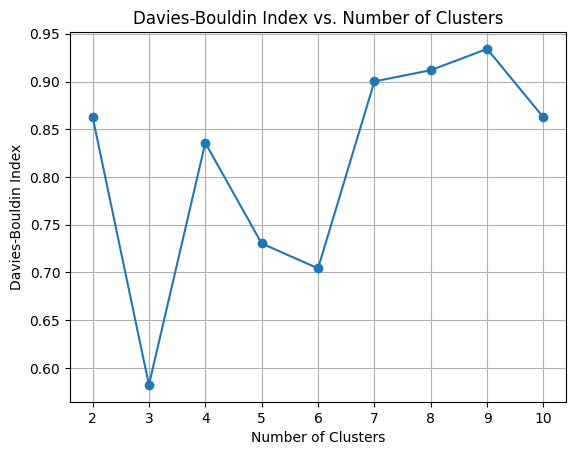

In [7]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Assuming data_one_hot is your DataFrame after one-hot encoding

# Perform PCA
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_one_hot)
data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3'])

# Range of cluster numbers
k_values = range(2, 11)  # Adjusted to start from 2 as DBI requires at least 2 clusters
dbi_scores = []

# Perform K-means for each k and calculate the Davies-Bouldin Index
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(data_pca)
    db_index = davies_bouldin_score(data_pca, cluster_labels)
    dbi_scores.append(db_index)
    print(f'Davies-Bouldin score for {k} clusters: {db_index}')

# Plot Davies-Bouldin Index
plt.plot(k_values, dbi_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index vs. Number of Clusters")
plt.grid(True)
plt.show()


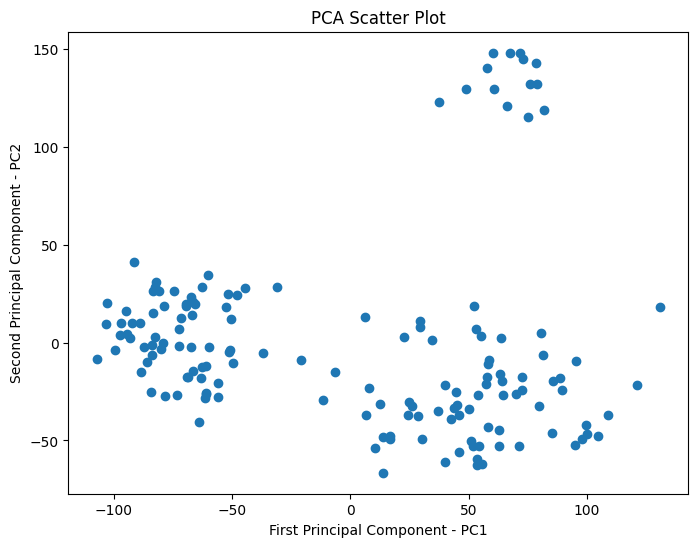

In [8]:
import matplotlib.pyplot as plt

# Create a scatter plot of the two principal components
plt.figure(figsize=(8,6))
plt.scatter(data_pca['PC1'], data_pca['PC2'])
plt.xlabel('First Principal Component - PC1')
plt.ylabel('Second Principal Component - PC2')
plt.title('PCA Scatter Plot')
plt.show()

In [ ]:
print(data_pca.columns)

Index(['PC1', 'PC2', 'PC3'], dtype='object')


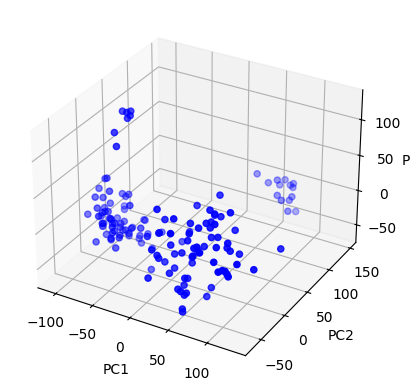

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Assuming data_pca is your DataFrame with PCA results
# Create a new figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot without color-coding by label
ax.scatter(data_pca['PC1'], data_pca['PC2'], data_pca['PC3'], color='blue')

# Add labels for the axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Show the plot
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Define the number of clusters
n_clusters = 3 # Change this to the number of clusters you want

# Create a KMeans instance with n_clusters
kmeans = KMeans(n_clusters=n_clusters)

# Fit the model to your data
kmeans.fit(data_pca[['PC1', 'PC2']])

# Get the cluster assignments
labels = kmeans.labels_

# Add the cluster labels to your dataframe
data_pca['Cluster'] = labels

# Now, data_pca has an additional column 'Cluster' with cluster assignments
data_pca.head()


,PC1,PC2,label,Cluster
0,121.050371,-21.744221,basal,0
1,108.849847,-36.810627,basal,0
2,131.031962,18.314178,basal,0
3,99.920003,-46.516147,basal,0
4,99.760043,-42.121018,basal,0
